# Imports and set up

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from blomap import blomap_extra_encode, add_padding

# Get the data

In [2]:
DATA_PATH = '/home/dreamtim/Coding/ITMO/itmo-cpp/with_processed_sequences.csv'
# This file can be downloaded from the kaggle notebook

In [3]:
df = pd.read_csv(DATA_PATH, index_col=0)
df

,sequence,extra_name,cpp_category,seq_length,cpp_type,origin,mol_weight,is_cpp_3,sequence_category,standard_sequence,nh3_tail,po3_pos,biotinylated,acylated_n_terminal,cyclic,amidated,stearyl_uptake,hexahistidine_tagged,modifications
0,(Acp)-KKKKKRFSFKKSFKLSGFSFKKNKK,NaN,NaN,NaN,NaN,NaN,NaN,yes,Peptide with Substitutions,AKKKKKRFSFKKSFKLSGFSFKKNKK,False,False,False,False,False,False,False,False,"[('C', 2), ('P', 3)]"
1,(Acp)-RKRRQTSMTDFYHSKRRLIFS,NaN,NaN,NaN,NaN,NaN,NaN,yes,Peptide with Substitutions,ARKRRQTSMTDFYHSKRRLIFS,False,False,False,False,False,False,False,False,"[('C', 2), ('P', 3)]"
2,(biotin)-lclrpvgggweaklakalakalakhlakalakalkacea,NaN,NaN,NaN,NaN,NaN,NaN,yes,Biotinylated,NaN,False,False,True,False,False,False,False,False,[]
3,(biotin)-lclrpvggrsqsrsryyrqrqrsrrrrrrs,NaN,NaN,NaN,NaN,NaN,NaN,yes,Biotinylated,NaN,False,False,True,False,False,False,False,False,[]
4,?A-RR-[KRRRRRE],NaN,NaN,NaN,NaN,NaN,NaN,yes,Unknown,ARRKRRRRRE,False,False,False,False,False,False,False,False,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,vrlpppvrlpppvrlppp,NaN,NaN,NaN,NaN,NaN,NaN,yes,Enantiomer Mix,NaN,False,False,False,False,False,False,False,False,[]
3098,ykqchkkGGkkGsG,NaN,NaN,NaN,NaN,NaN,NaN,yes,Enantiomer Mix,GGGG,False,False,False,False,False,False,False,False,"[('Y', 1), ('K', 2), ('Q', 3), ('C', 4), ('H',..."
3099,"α,ε(Stearyl-AGYLLG)2KINLKALAALAKKIL",NaN,NaN,NaN,NaN,NaN,NaN,yes,Uptake with Stearyl,SAGYLLGKINLKALAALAKKIL,False,False,False,False,False,False,True,False,"[('T', 2), ('E', 3), ('A', 4), ('R', 5), ('Y',..."
3100,δ-(Stearyl-AGYLLG)OINLKALAALAKKIL,NaN,NaN,NaN,NaN,NaN,NaN,yes,Uptake with Stearyl,NaN,False,False,False,False,False,False,True,False,"[('T', 2), ('E', 3), ('A', 4), ('R', 5), ('Y',..."


In [4]:
df['seq_length'] = df['sequence'].apply(lambda s: len(s) if isinstance(s, str) else 0)

In [5]:
df.columns

Index(['sequence', 'extra_name', 'cpp_category', 'seq_length', 'cpp_type',
       'origin', 'mol_weight', 'is_cpp_3', 'sequence_category',
       'standard_sequence', 'nh3_tail', 'po3_pos', 'biotinylated',
       'acylated_n_terminal', 'cyclic', 'amidated', 'stearyl_uptake',
       'hexahistidine_tagged', 'modifications'],
      dtype='object')

In [6]:
print(df['sequence'].duplicated().sum())

0


# Embeddings

### Blomap

In [7]:
SEQ_LEN = df['seq_length'].max()
print(SEQ_LEN)

269


In [8]:
df['adjusted_sequence'] = df['standard_sequence'].apply(lambda s: add_padding(s, SEQ_LEN) if isinstance(s, str) else s)

In [9]:
df.head()

,sequence,extra_name,cpp_category,seq_length,cpp_type,origin,mol_weight,is_cpp_3,sequence_category,standard_sequence,nh3_tail,po3_pos,biotinylated,acylated_n_terminal,cyclic,amidated,stearyl_uptake,hexahistidine_tagged,modifications,adjusted_sequence
0,(Acp)-KKKKKRFSFKKSFKLSGFSFKKNKK,NaN,NaN,31,NaN,NaN,NaN,yes,Peptide with Substitutions,AKKKKKRFSFKKSFKLSGFSFKKNKK,False,False,False,False,False,False,False,False,"[('C', 2), ('P', 3)]",AKKKKKRFSFKKSFKLSGFSFKKNKKXXXXXXXXXXXXXXXXXXXX...
1,(Acp)-RKRRQTSMTDFYHSKRRLIFS,NaN,NaN,27,NaN,NaN,NaN,yes,Peptide with Substitutions,ARKRRQTSMTDFYHSKRRLIFS,False,False,False,False,False,False,False,False,"[('C', 2), ('P', 3)]",ARKRRQTSMTDFYHSKRRLIFSXXXXXXXXXXXXXXXXXXXXXXXX...
2,(biotin)-lclrpvgggweaklakalakalakhlakalakalkacea,NaN,NaN,48,NaN,NaN,NaN,yes,Biotinylated,NaN,False,False,True,False,False,False,False,False,[],NaN
3,(biotin)-lclrpvggrsqsrsryyrqrqrsrrrrrrs,NaN,NaN,39,NaN,NaN,NaN,yes,Biotinylated,NaN,False,False,True,False,False,False,False,False,[],NaN
4,?A-RR-[KRRRRRE],NaN,NaN,15,NaN,NaN,NaN,yes,Unknown,ARRKRRRRRE,False,False,False,False,False,False,False,False,[],ARRKRRRRREXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...


In [10]:
# Get a non-NaN sequence
non_nan_sequence = df['adjusted_sequence'].dropna().iloc[0]

# Get the Blomap embedding for the sequence
embedding = blomap_extra_encode(non_nan_sequence)

# Get the length of the embedding
SHAPE = len(embedding)
print(SHAPE)

2959


In [11]:
blomap_embeddings = list(df['adjusted_sequence'].apply(blomap_extra_encode, args=(SHAPE,)))

In [12]:
blomap_embeddings = np.array(blomap_embeddings)
print(blomap_embeddings.shape)

(2922, 2959)


In [13]:
np.save('blomap_embeddings.npy', blomap_embeddings)

### ProtBERT

In [14]:
%%capture
%pip install transformers torch

In [15]:
import torch
from transformers import BertModel, BertTokenizer

In [16]:
# Load the pre-trained ProtBERT model and tokenizer
model_name = "Rostlab/prot_bert_bfd"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

In [17]:
print(torch.cuda.is_available())  # Should return True if CUDA is available
print(torch.cuda.current_device())  # Should return the current GPU device ID
print(torch.cuda.get_device_name(torch.cuda.current_device()))  # GPU name

True
0
NVIDIA GeForce RTX 4050 Laptop GPU


In [18]:
# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30, 1024, padding_idx=0)
    (position_embeddings): Embedding(40000, 1024)
    (token_type_embeddings): Embedding(2, 1024)
    (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-29): 30 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=1024, out_features=1024, bias=True)
            (key): Linear(in_features=1024, out_features=1024, bias=True)
            (value): Linear(in_features=1024, out_features=1024, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=1024, out_features=1024, bias=True)
            (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.0, i

In [19]:
def get_protbert_embedding(sequence):
    # Tokenize the sequence
    inputs = tokenizer(sequence, return_tensors="pt", padding=True, truncation=True, max_length=1024)

    # Move inputs to GPU
    inputs = {key: value.to(device) for key, value in inputs.items()}

    # Get embeddings from the model
    with torch.no_grad():
        outputs = model(**inputs)

    # Get the embeddings (the last hidden states of the model)
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze()  # Average the token embeddings across the sequence
    return embeddings

In [20]:
example_sequence = df['standard_sequence'].dropna().iloc[0]
embedding = get_protbert_embedding(example_sequence)
print(embedding.shape)

torch.Size([1024])


In [21]:
# Get ProtBERT embeddings for all sequences in parallel on GPU
sequences = df['standard_sequence'].fillna('').tolist()  # Fill NaN with empty strings
batch_size = 32  # Adjust batch size based on your GPU memory

protbert_embeddings = []

for i in range(0, len(sequences), batch_size):
    batch_sequences = sequences[i:i + batch_size]
    inputs = tokenizer(batch_sequences, return_tensors="pt", padding=True, truncation=True, max_length=1024)
    inputs = {key: value.to(device) for key, value in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
        batch_embeddings = outputs.last_hidden_state.mean(dim=1).cpu().numpy()  # Move to CPU

    protbert_embeddings.append(batch_embeddings)

protbert_embeddings = np.vstack(protbert_embeddings)
print(protbert_embeddings.shape)

# Save the embeddings to a .npy file
np.save('protbert_embeddings.npy', protbert_embeddings)

model.safetensors:  93%|#########2| 1.56G/1.68G [00:00<?, ?B/s]

(2922, 1024)


### AlphaFold

Not imlemented yet! Not possible on local machine, since the total download size for the full databases is around 415 GB and the total size when unzipped is 2.2 TB

# SMILES

In [22]:
df.columns

Index(['sequence', 'extra_name', 'cpp_category', 'seq_length', 'cpp_type',
       'origin', 'mol_weight', 'is_cpp_3', 'sequence_category',
       'standard_sequence', 'nh3_tail', 'po3_pos', 'biotinylated',
       'acylated_n_terminal', 'cyclic', 'amidated', 'stearyl_uptake',
       'hexahistidine_tagged', 'modifications', 'adjusted_sequence'],
      dtype='object')

In [23]:
import re
from rdkit import Chem

In [24]:
# SMILES map for common modifications
modification_smiles_map = {
    "Ac-": "CC(=O)",                # Acetyl group (N-terminal acetylation)
    "(biotin)": "C1CCCCC1NC(=O)CCC(=O)N",  # Biotin
    "-NH2": "N",                    # Amidation (C-terminal -NH2)
    "Stearyl": "CCCCCCCCCCCCCCCC(=O)",  # Stearyl group
    "Myristoyl": "CCCCCCCCCCCCCC(=O)",  # Myristoyl group
    "Lauroyl": "CCCCCCCCCCCC(=O)"       # Lauroyl group
}


In [25]:
aa_smiles_map = {
    'A': 'N[C@@H](C)C(=O)',  'a': 'N[C@H](C)C(=O)',  # Alanine
    'C': 'N[C@@H](CS)C(=O)', 'c': 'N[C@H](CS)C(=O)',  # Cysteine
    'D': 'N[C@@H](CC(=O)O)C(=O)', 'd': 'N[C@H](CC(=O)O)C(=O)',  # Aspartic acid
    'E': 'N[C@@H](CCC(=O)O)C(=O)', 'e': 'N[C@H](CCC(=O)O)C(=O)',  # Glutamic acid
    'F': 'N[C@@H](CC1=CC=CC=C1)C(=O)', 'f': 'N[C@H](CC1=CC=CC=C1)C(=O)',  # Phenylalanine
    'G': 'NCC(=O)', 'g': 'NCC(=O)',  # Glycine
    'H': 'N[C@@H](CC1=CNC=N1)C(=O)', 'h': 'N[C@H](CC1=CNC=N1)C(=O)',  # Histidine
    'I': 'N[C@@H](C(C)CC)C(=O)', 'i': 'N[C@H](C(C)CC)C(=O)',  # Isoleucine
    'K': 'N[C@@H](CCCCN)C(=O)', 'k': 'N[C@H](CCCCN)C(=O)',  # Lysine
    'L': 'N[C@@H](CC(C)C)C(=O)', 'l': 'N[C@H](CC(C)C)C(=O)',  # Leucine
    'M': 'N[C@@H](CCSC)C(=O)', 'm': 'N[C@H](CCSC)C(=O)',  # Methionine
    'N': 'N[C@@H](CC(=O)N)C(=O)', 'n': 'N[C@H](CC(=O)N)C(=O)',  # Asparagine
    'P': 'N1[C@@H](CCC1)C(=O)', 'p': 'N1[C@H](CCC1)C(=O)',  # Proline
    'Q': 'N[C@@H](CCC(=O)N)C(=O)', 'q': 'N[C@H](CCC(=O)N)C(=O)',  # Glutamine
    'R': 'N[C@@H](CCCNC(=N)N)C(=O)', 'r': 'N[C@H](CCCNC(=N)N)C(=O)',  # Arginine
    'S': 'N[C@@H](CO)C(=O)', 's': 'N[C@H](CO)C(=O)',  # Serine
    'T': 'N[C@@H](C(O)C)C(=O)', 't': 'N[C@H](C(O)C)C(=O)',  # Threonine
    'V': 'N[C@@H](C(C)C)C(=O)', 'v': 'N[C@H](C(C)C)C(=O)',  # Valine
    'W': 'N[C@@H](CC1=CNC2=CC=CC=C12)C(=O)', 'w': 'N[C@H](CC1=CNC2=CC=CC=C12)C(=O)',  # Tryptophan
    'Y': 'N[C@@H](CC1=CC=C(O)C=C1)C(=O)', 'y': 'N[C@H](CC1=CC=C(O)C=C1)C(=O)',  # Tyrosine
    'X': '*', '?': '*',  # Wildcard for unknown residues
    'O': 'N[C@@H](CCC(N)C(=O))C(=O)',  # Ornithine
}


In [26]:
# Updated modification and amino acid SMILES map
modification_smiles_map.update({
    "NII": "NC(C)C(=O)",  # Example placeholder for NII
    "PIC": "N1C=C(C(=O)N1)C",  # Example placeholder for PIC
    "IC": "NC1=NC=NC(=O)1"  # Example placeholder for IC
})

aa_smiles_map.update({
    'Aib': 'N[C@H](C(C)C)C(=O)',  # Alpha-aminoisobutyric acid
    'B': 'N[C@@H](CC(=O)O)C(=O)',  # Ambiguous (Asn/Asp as example)
    'b': 'N[C@@H](CS)C(=O)'  # Could be beta-Amino acid or placeholder
})

In [27]:
from collections import Counter

# Dictionary to count unrecognized amino acids
unrecognized_amino_acids_count = Counter()
UNRECOGNIZED_SEQUENCES = set()

# Function to handle repeats like R8 or S5
def expand_repeats(sequence):
    import re
    repeat_pattern = re.compile(r'([A-Z][a-z]*)(\d+)')
    expanded = []
    for match in repeat_pattern.finditer(sequence):
        aa, count = match.groups()
        expanded.append(aa * int(count))
    return re.sub(repeat_pattern, '', sequence) + ''.join(expanded)

# Function to convert raw sequence into SMILES
def raw_sequence_to_smiles(sequence):
    smiles_parts = []

    # Expand repeats like R8 or S5
    sequence = expand_repeats(sequence)

    # Handle modifications in the sequence
    for mod, mod_smiles in modification_smiles_map.items():
        if mod in sequence:
            sequence = sequence.replace(mod, "")
            smiles_parts.append(mod_smiles)

    # Handle the core amino acid sequence
    for aa in re.findall(r'[A-Z][a-z]*', sequence):
        if aa in aa_smiles_map:
            smiles_parts.append(aa_smiles_map[aa])
        else:
            print(f"Warning: Unrecognized amino acid or modification '{aa}' in {sequence}")
            unrecognized_amino_acids_count[aa] += 1
            UNRECOGNIZED_SEQUENCES.add(sequence)

    # Join SMILES fragments
    final_smiles = ''.join(smiles_parts)

    # Validate with RDKit
    try:
        mol = Chem.MolFromSmiles(final_smiles)
        return Chem.MolToSmiles(mol) if mol else None
    except Exception:
        return None

In [28]:
df['smiles_sequence'] = df['sequence'].apply(raw_sequence_to_smiles)

[21:32:42] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:32:42] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:32:42] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:32:42] Explicit valence for atom # 10 C, 5, is greater than permitted
[21:32:42] Explicit valence for atom # 10 C, 5, is greater than permitted


[21:32:43] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:32:43] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:32:43] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:32:43] Explicit valence for atom # 5 C, 5, is greater than permitted


[21:32:43] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:32:43] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:32:43] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:32:43] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:32:43] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:32:43] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:32:43] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:32:43] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:32:43] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:32:43] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:32:43] Explicit valence for atom # 5 C, 5, is greater than permitted


[21:32:43] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:32:43] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:32:43] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:32:43] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:32:43] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:32:43] Explicit valence for atom # 5 C, 5, is greater than permitted


[21:32:43] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:32:43] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:32:43] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:32:43] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:32:43] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:32:43] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:32:43] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:32:43] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:32:44] Explicit valence for atom # 5 C, 5, is greater than permitted


[21:32:44] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:32:44] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:32:44] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:32:44] Explicit valence for atom # 5 C, 5, is greater than permitted


[21:32:44] Explicit valence for atom # 5 C, 5, is greater than permitted


[21:32:45] Explicit valence for atom # 5 C, 5, is greater than permitted
[21:32:45] Explicit valence for atom # 5 C, 5, is greater than permitted


[21:32:45] Explicit valence for atom # 5 C, 5, is greater than permitted


In [29]:
unrecognized_amino_acids_count

Counter({'Rr': 52,
         'Lys': 39,
         'Ac': 34,
         'Nspe': 34,
         'Nbtg': 20,
         'Xr': 19,
         'Et': 18,
         'His': 12,
         'Mpa': 12,
         'Cou': 12,
         'Kr': 11,
         'U': 10,
         'Grrrrrrrrr': 9,
         'Ahx': 9,
         'Npm': 8,
         'Nssb': 8,
         'Lr': 8,
         'Xk': 6,
         'Xrr': 5,
         'Cys': 5,
         'Lip': 5,
         'Qq': 5,
         'Fr': 5,
         'Kk': 5,
         'Hr': 5,
         'Bpg': 4,
         'Gr': 4,
         'Leu': 4,
         'Ct': 3,
         'Rho': 3,
         'Kf': 3,
         'Ic': 3,
         'Qa': 3,
         'Gg': 3,
         'Wl': 3,
         'Acp': 2,
         'Krrrrrrr': 2,
         'Krrrrrrrr': 2,
         'Cya': 2,
         'Rw': 2,
         'Me': 2,
         'Hey': 2,
         'Ra': 2,
         'Rh': 2,
         'Rk': 2,
         'Cl': 2,
         'Hrr': 2,
         'Ksa': 1,
         'Acetyl': 1,
         'Brr': 1,
         'Wr': 1,
         'Cr': 1,
    

In [30]:
for el in UNRECOGNIZED_SEQUENCES:
    print(el)

FFFFFFGGGGGGrrrRR
KrRrRrRrRrRELTFKEYWDQLTSAA
CRWrWKCCKK
MGVADLIKKFESISKEEGGGGK(RhB)GGrRrRrRRR
XPAANVGrrrrrrrrrXk(FL)-NHH
AGY-C-Bpg-LGKINLKALAALAKKILFFF
rXrrXrrXrrXr
AcHGLASTLTRWAHYNALIRAFC-CONHH
rHHLrHLrrHLrHLLrHLrHHL
KLULKLULKULKAULKLU
B-[KrrrrrrrE]
eeeeeeeeeXPAANVGrrrrrrrrrXk(FL)-NHH
CGRKKRRQR-Ahx-RRPPQ
eeeeeeeeeXPAACtVGrrrrrrrrrXk(FL)-NHH
Acetyl-RLWRLLWRLWRRLWRLLR-NHH
LAELLAELLAELGGGGrrrrrrrrr
LLIILRRRIRKQaHAHSK
Ahx-RRRRRRRRR
Dabcyl-RRRRRRK-Rho-NHH
GD(Abu)LPHLKLC
RRRRRRRR-c(RGDfK)
K-Hey-FQWQRNMRKVRGPPVS-Hey-IKR
BRrXRrXRrX
Mpa(luc)-GSLKTRVLKR-NHH
CGRKKRRQRR-Ahx-RPPQ
Mpa(luc)-KRWKLFNKQE-NHH
FXrFXrFXrFXrFXr
CKRRMKWKK-Cys
rRrGrKkRr
ykqchkkGGkkGsG
rRrRrRrR
GPLGIAGQrrrrrrrrr
RGD-Ahx-RRRRRRRR
eeeeeeeeeXPAANVGrrrrrrrrrXk([125I]IB)-NHH
AGYLLGK[Ksa4qn4]INLKALAALAKKILKK
NLys-Npm-Npm-NLys-Npm-Npm-NLys-Npm-Npm-NLys-Npm-Npm
Cys-RRRRRRRR-dGR-Lip
LKlLKkLlkKLLkLL
CrwrwKCCKK
MGVADLIKKFESISKEEGGGGK(PA-RhB)GGrRrRrRRR
KrKfIcLGRaDPAYQaRFL
KrRrGgKkRrD
Mpa(luc)-LKRWKLFNKQ-NHH
eeeeeeeeeXPAACtVGrrrrrrrrrXk([

In [31]:
# Update modification and amino acid SMILES map to handle the unrecognized amino acids
modification_smiles_map.update({
    "Nspe": "N[C@H](C(C)O)C(=O)",  # Placeholder for N-spe (needs actual structure)
    "Nbtg": "N[C@H](C(C)(C)C)C(=O)",  # Placeholder for N-btg (needs actual structure)
    "Ac": "CC(=O)",  # Acetyl group (already in the original map, handling here for completeness)
    "Et": "CC",  # Ethyl group (modification, placeholder)
    "Npm": "N1[C@H](C(C)C)C(=O)",  # Placeholder for Npm (needs actual structure)
    "Nssb": "N1[C@H](C(C)CC)C(=O)",  # Placeholder for Nssb (needs actual structure)
    "Mpa": "NC(=O)C(C)C(C)C(=O)",  # Placeholder for Mpa (needs actual structure)
    "Cou": "C1=CC2=C(C=C1)C(=O)O2",  # Placeholder for Cou (needs actual structure)
    "Xr": "N[C@H](C(C)C)C(=O)",  # Placeholder for Xr (needs actual structure)
    "His": "N[C@@H](CC1=CNC=N1)C(=O)",  # Histidine (already handled in the original map, handling here for completeness)
})

aa_smiles_map.update({
    'Rr': 'N[C@@H](CC(C)C)C(=O)',  # Placeholder for Rr (represents an amino acid sequence with R and R-like groups)
    'Lys': 'N[C@H](CCCCN)C(=O)',  # Lysine (already in original map)
    'Grrrrrrrrr': 'N[C@@H](C(C)CCCCCCCCCC)C(=O)',  # Placeholder for Grrrrrrrrr, assume a modified version
    'Ahx': 'N[C@H](CC(C)CC)C(=O)',  # Placeholder for Ahx (needs actual structure)
    'Kr': 'N[C@H](CC(C)CN)C(=O)',  # Placeholder for Kr (needs actual structure)
    'Lr': 'N[C@H](CC(C)C(C)C)C(=O)',  # Placeholder for Lr (needs actual structure)
    'U': 'NC1=NC2=C(C=C1)C(=O)N2',  # Placeholder for U (assumed modified structure)
})


In [32]:
# Dictionary to count unrecognized amino acids
unrecognized_amino_acids_count = Counter()
UNRECOGNIZED_SEQUENCES = set()

# Function to handle repeats like R8 or S5
def expand_repeats(sequence):
    repeat_pattern = re.compile(r'([A-Z][a-z]*)(\d+)')
    expanded = []
    for match in repeat_pattern.finditer(sequence):
        aa, count = match.groups()
        expanded.append(aa * int(count))
    return re.sub(repeat_pattern, '', sequence) + ''.join(expanded)

# Function to convert raw sequence into SMILES
def raw_sequence_to_smiles(sequence):
    smiles_parts = []

    # Expand repeats like R8 or S5
    sequence = expand_repeats(sequence)

    # Handle modifications in the sequence
    for mod, mod_smiles in modification_smiles_map.items():
        if mod in sequence:
            sequence = sequence.replace(mod, "")
            smiles_parts.append(mod_smiles)

    # Handle the core amino acid sequence
    for aa in re.findall(r'[A-Z][a-z]*', sequence):
        if aa in aa_smiles_map:
            smiles_parts.append(aa_smiles_map[aa])
        else:
            unrecognized_amino_acids_count[aa] += 1
            UNRECOGNIZED_SEQUENCES.add(sequence)

    # Join SMILES fragments
    final_smiles = ''.join(smiles_parts)

    # Validate with RDKit
    try:
        mol = Chem.MolFromSmiles(final_smiles)
        return Chem.MolToSmiles(mol) if mol else None
    except Exception:
        return None

Final function

In [33]:
def sequence_to_smiles(row):
    try:
        mol = Chem.MolFromSequence(row['sequence'])
        if not mol:
            return raw_sequence_to_smiles(row['sequence'])
        if mol:
            return Chem.MolToSmiles(mol) if mol else None
    except Exception as e:
        return raw_sequence_to_smiles(row['sequence'])


In [34]:
df['smiles_sequence'] = df.apply(sequence_to_smiles, axis=1)

[21:32:45] Explicit valence for atom # 10 C, 5, is greater than permitted
[21:32:45] Explicit valence for atom # 10 C, 5, is greater than permitted
[21:32:47] SMILES Parse Error: unclosed ring for input: 'N1[C@H](C(C)CC)C(=O)N[C@@H](CC(=O)N)C(=O)N[C@H](CCCCN)C(=O)N[C@@H](CC(=O)N)C(=O)N[C@H](CCCCN)C(=O)N[C@@H](CC(=O)N)C(=O)N[C@H](CCCCN)C(=O)N[C@@H](CC(=O)N)C(=O)N[C@H](CCCCN)C(=O)'
[21:32:47] Explicit valence for atom # 8 O, 3, is greater than permitted
[21:32:47] Explicit valence for atom # 8 O, 3, is greater than permitted


In [35]:
df

,sequence,extra_name,cpp_category,seq_length,cpp_type,origin,mol_weight,is_cpp_3,sequence_category,standard_sequence,...,po3_pos,biotinylated,acylated_n_terminal,cyclic,amidated,stearyl_uptake,hexahistidine_tagged,modifications,adjusted_sequence,smiles_sequence
0,(Acp)-KKKKKRFSFKKSFKLSGFSFKKNKK,NaN,NaN,31,NaN,NaN,NaN,yes,Peptide with Substitutions,AKKKKKRFSFKKSFKLSGFSFKKNKK,...,False,False,False,False,False,False,False,"[('C', 2), ('P', 3)]",AKKKKKRFSFKKSFKLSGFSFKKNKKXXXXXXXXXXXXXXXXXXXX...,CC(=O)N[C@@H](CCCCN)C(=O)N[C@@H](CCCCN)C(=O)N[...
1,(Acp)-RKRRQTSMTDFYHSKRRLIFS,NaN,NaN,27,NaN,NaN,NaN,yes,Peptide with Substitutions,ARKRRQTSMTDFYHSKRRLIFS,...,False,False,False,False,False,False,False,"[('C', 2), ('P', 3)]",ARKRRQTSMTDFYHSKRRLIFSXXXXXXXXXXXXXXXXXXXXXXXX...,CCC(C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CCC...
2,(biotin)-lclrpvgggweaklakalakalakhlakalakalkacea,NaN,NaN,48,NaN,NaN,NaN,yes,Biotinylated,NaN,...,False,True,False,False,False,False,False,[],NaN,NC(=O)CCC(=O)NC1CCCCC1
3,(biotin)-lclrpvggrsqsrsryyrqrqrsrrrrrrs,NaN,NaN,39,NaN,NaN,NaN,yes,Biotinylated,NaN,...,False,True,False,False,False,False,False,[],NaN,NC(=O)CCC(=O)NC1CCCCC1
4,?A-RR-[KRRRRRE],NaN,NaN,15,NaN,NaN,NaN,yes,Unknown,ARRKRRRRRE,...,False,False,False,False,False,False,False,[],ARRKRRRRREXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,C[C@H](N)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,vrlpppvrlpppvrlppp,NaN,NaN,18,NaN,NaN,NaN,yes,Enantiomer Mix,NaN,...,False,False,False,False,False,False,False,[],NaN,CC(C)C[C@H](NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@@H...
3098,ykqchkkGGkkGsG,NaN,NaN,14,NaN,NaN,NaN,yes,Enantiomer Mix,GGGG,...,False,False,False,False,False,False,False,"[('Y', 1), ('K', 2), ('Q', 3), ('C', 4), ('H',...",GGGGXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,NCCCC[C@H](NC(=O)CNC(=O)CNC(=O)[C@H](CCCCN)NC(...
3099,"α,ε(Stearyl-AGYLLG)2KINLKALAALAKKIL",NaN,NaN,35,NaN,NaN,NaN,yes,Uptake with Stearyl,SAGYLLGKINLKALAALAKKIL,...,False,False,False,False,False,True,False,"[('T', 2), ('E', 3), ('A', 4), ('R', 5), ('Y',...",SAGYLLGKINLKALAALAKKILXXXXXXXXXXXXXXXXXXXXXXXX...,CCCCCCCCCCCCCCCC(=O)N[C@@H](C)C(=O)NCC(=O)N[C@...
3100,δ-(Stearyl-AGYLLG)OINLKALAALAKKIL,NaN,NaN,33,NaN,NaN,NaN,yes,Uptake with Stearyl,NaN,...,False,False,False,False,False,True,False,"[('T', 2), ('E', 3), ('A', 4), ('R', 5), ('Y',...",NaN,CCCCCCCCCCCCCCCC(=O)N[C@@H](C)C(=O)NCC(=O)N[C@...


In [36]:
# Check if SMILES are not NaN
valid_smiles = df['smiles_sequence'].notna()

# Calculate the percentage of valid SMILES
valid_percentage = valid_smiles.mean() * 100
invalid_percentage = 100 - valid_percentage

# Print the percentages
print(f'Percentage of Valid SMILES: {valid_percentage:.2f}%')
print(f'Percentage of Invalid SMILES: {invalid_percentage:.2f}%')


Percentage of Valid SMILES: 99.83%
Percentage of Invalid SMILES: 0.17%


In [37]:
from rdkit import Chem

def is_valid_smiles(smiles):
    if not smiles:
        return False
    try:
        mol = Chem.MolFromSmiles(smiles)
        return mol is not None
    except:
        return False

# Apply the validation function to the 'smiles_sequence' column
df['is_valid_smiles'] = df['smiles_sequence'].apply(lambda x: is_valid_smiles(x) if pd.notna(x) else False)

# Calculate the percentage of valid SMILES
valid_percentage = df['is_valid_smiles'].mean() * 100

# Print the percentage of valid SMILES
print(f'Percentage of Valid SMILES: {valid_percentage:.2f}%')

# Check if all SMILES sequences are valid
if valid_percentage == 100:
    print("ALL SMILES ARE VALID!")

# Print the DataFrame with the new column
df.head()

Percentage of Valid SMILES: 99.83%


,sequence,extra_name,cpp_category,seq_length,cpp_type,origin,mol_weight,is_cpp_3,sequence_category,standard_sequence,...,biotinylated,acylated_n_terminal,cyclic,amidated,stearyl_uptake,hexahistidine_tagged,modifications,adjusted_sequence,smiles_sequence,is_valid_smiles
0,(Acp)-KKKKKRFSFKKSFKLSGFSFKKNKK,NaN,NaN,31,NaN,NaN,NaN,yes,Peptide with Substitutions,AKKKKKRFSFKKSFKLSGFSFKKNKK,...,False,False,False,False,False,False,"[('C', 2), ('P', 3)]",AKKKKKRFSFKKSFKLSGFSFKKNKKXXXXXXXXXXXXXXXXXXXX...,CC(=O)N[C@@H](CCCCN)C(=O)N[C@@H](CCCCN)C(=O)N[...,True
1,(Acp)-RKRRQTSMTDFYHSKRRLIFS,NaN,NaN,27,NaN,NaN,NaN,yes,Peptide with Substitutions,ARKRRQTSMTDFYHSKRRLIFS,...,False,False,False,False,False,False,"[('C', 2), ('P', 3)]",ARKRRQTSMTDFYHSKRRLIFSXXXXXXXXXXXXXXXXXXXXXXXX...,CCC(C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CCC...,True
2,(biotin)-lclrpvgggweaklakalakalakhlakalakalkacea,NaN,NaN,48,NaN,NaN,NaN,yes,Biotinylated,NaN,...,True,False,False,False,False,False,[],NaN,NC(=O)CCC(=O)NC1CCCCC1,True
3,(biotin)-lclrpvggrsqsrsryyrqrqrsrrrrrrs,NaN,NaN,39,NaN,NaN,NaN,yes,Biotinylated,NaN,...,True,False,False,False,False,False,[],NaN,NC(=O)CCC(=O)NC1CCCCC1,True
4,?A-RR-[KRRRRRE],NaN,NaN,15,NaN,NaN,NaN,yes,Unknown,ARRKRRRRRE,...,False,False,False,False,False,False,[],ARRKRRRRREXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,C[C@H](N)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](...,True


In [38]:
BAD_SEQUENCES = """
MGVADLIKKFESISKEEGGGGK(RhB)GGrRrRrRRR
A-C-Bpg-LYLLGKINLKALAALAKKILFFF
eeeeeeeeeXPAACtVGrrrrrrrrrXk(FL)-NHH
H-RRRRRRK-Rho-NHH
eeeeeeeeeXPAANVGrrrrrrrrrXk(FL)-NHH
M-Rho-GRKKRRQRRR-NHH
Z-LRGG-AMC
B-[KrrrrrrrE]
RKKRRQRRR-OL-Pdna
AGY-C-Bpg-LGKINLKALAALAKKILFFF
PFVYL-Lip-
agy-C-Bpg-lgkinlkalaalakkilFFF
GD(Abu)LPHLKLC
FSDMeSSSVPNBBRNCG
BrrrrX
eeeeeeeeeXPAANVGrrrrrrrrrXk([125I]IB)-NHH
?A-[KrrrrrrrE]
ε-(Steary-AGYLLG)KINLKALAALAKKIL
XPAACtVGrrrrrrrrrXk(FL)-NHH
CF-Cys-BLGTYTQDFNXFHTFPQTAIGVGAP
AGYLLGK[Ksa4qn4]INLKALAALAKKILKK
Cyclo(FΦRRRRQ)
eeeeeeeeeXPAACtVGrrrrrrrrrXk([125I]IB)-NHH
MGVADLIKKFESISKEEGGGGK(Ahx-FITC)-GGrRrRrRRR
B-[KrrrrrrrrE]
MGVADLIKKFESISKEEGGGGK(PA-RhB)GGrRrRrRRR
NLys-NLys-NLys-NLys-NLys-NLys-NLys-NLys-NLeu-NLeu-NLeu-NLeu-Nleu
XPAANVGrrrrrrrrrXk(FL)-NHH
VGAlAvVvWlWlWlWbA-GSG-PKKKRKVC
?A-[KrrrrrrrrE]
RRRRRRRR-c(RGDfK)
Dabcyl-RRRRRRK-Rho-NHH
a-C-Bpg-lyllgkinlkalaalakkilFFF
"""

In [39]:
df.to_csv('with_smiles.csv', index=False)

# SMILES based embeddings

In [40]:
from rdkit.Chem import AllChem

counter = 0

def get_morgan_fingerprint(smiles, radius=2, nBits=1024):
    """Generate a Morgan fingerprint from a SMILES string."""
    try:
        molecule = Chem.MolFromSmiles(smiles)
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(molecule, radius, nBits=nBits)
        return np.array(fingerprint)
    except Exception:
        global counter
        counter += 1
        return np.zeros(nBits)  # Return a zero array of the desired shape if the SMILES is invalid

# Generate fingerprints for all SMILES
fingerprints = []

for smiles in df['smiles_sequence']:
    fingerprint = get_morgan_fingerprint(smiles)
    fingerprints.append(fingerprint)

[21:32:49] DEPRECATION WARNING: please use MorganGenerator
[21:32:49] DEPRECATION WARNING: please use MorganGenerator
[21:32:49] DEPRECATION WARNING: please use MorganGenerator
[21:32:49] DEPRECATION WARNING: please use MorganGenerator
[21:32:49] DEPRECATION WARNING: please use MorganGenerator
[21:32:49] DEPRECATION WARNING: please use MorganGenerator
[21:32:49] DEPRECATION WARNING: please use MorganGenerator
[21:32:49] DEPRECATION WARNING: please use MorganGenerator
[21:32:49] DEPRECATION WARNING: please use MorganGenerator
[21:32:49] DEPRECATION WARNING: please use MorganGenerator
[21:32:49] DEPRECATION WARNING: please use MorganGenerator
[21:32:49] DEPRECATION WARNING: please use MorganGenerator
[21:32:49] DEPRECATION WARNING: please use MorganGenerator
[21:32:49] DEPRECATION WARNING: please use MorganGenerator
[21:32:49] DEPRECATION WARNING: please use MorganGenerator
[21:32:49] DEPRECATION WARNING: please use MorganGenerator
[21:32:49] DEPRECATION WARNING: please use MorganGenerat

In [41]:
# Convert list of fingerprints to a NumPy array
fingerprints_array = np.array(fingerprints)

print(fingerprints_array.shape)  # Print the shape of the resulting array
print('Empty num:', counter)

# Save the fingerprints to a .npy file
np.save('morgan_fingerprints.npy', fingerprints_array)

(2922, 1024)
Empty num: 5


In [42]:
print(df['smiles_sequence'][0])

CC(=O)N[C@@H](CCCCN)C(=O)N[C@@H](CCCCN)C(=O)N[C@@H](CCCCN)C(=O)N[C@@H](CCCCN)C(=O)N[C@@H](CCCCN)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CO)C(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CCCCN)C(=O)N[C@@H](CCCCN)C(=O)N[C@@H](CO)C(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CCCCN)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CO)C(=O)NCC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CO)C(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](CCCCN)C(=O)N[C@@H](CCCCN)C(=O)N[C@@H](CC(N)=O)C(=O)N[C@@H](CCCCN)C(=O)N[C@H](C=O)CCCCN


In [43]:
df.is_cpp_3.value_counts()

is_cpp_3
yes     1601
no      1141
both     180
Name: count, dtype: int64

In [44]:
df

,sequence,extra_name,cpp_category,seq_length,cpp_type,origin,mol_weight,is_cpp_3,sequence_category,standard_sequence,...,biotinylated,acylated_n_terminal,cyclic,amidated,stearyl_uptake,hexahistidine_tagged,modifications,adjusted_sequence,smiles_sequence,is_valid_smiles
0,(Acp)-KKKKKRFSFKKSFKLSGFSFKKNKK,NaN,NaN,31,NaN,NaN,NaN,yes,Peptide with Substitutions,AKKKKKRFSFKKSFKLSGFSFKKNKK,...,False,False,False,False,False,False,"[('C', 2), ('P', 3)]",AKKKKKRFSFKKSFKLSGFSFKKNKKXXXXXXXXXXXXXXXXXXXX...,CC(=O)N[C@@H](CCCCN)C(=O)N[C@@H](CCCCN)C(=O)N[...,True
1,(Acp)-RKRRQTSMTDFYHSKRRLIFS,NaN,NaN,27,NaN,NaN,NaN,yes,Peptide with Substitutions,ARKRRQTSMTDFYHSKRRLIFS,...,False,False,False,False,False,False,"[('C', 2), ('P', 3)]",ARKRRQTSMTDFYHSKRRLIFSXXXXXXXXXXXXXXXXXXXXXXXX...,CCC(C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CCC...,True
2,(biotin)-lclrpvgggweaklakalakalakhlakalakalkacea,NaN,NaN,48,NaN,NaN,NaN,yes,Biotinylated,NaN,...,True,False,False,False,False,False,[],NaN,NC(=O)CCC(=O)NC1CCCCC1,True
3,(biotin)-lclrpvggrsqsrsryyrqrqrsrrrrrrs,NaN,NaN,39,NaN,NaN,NaN,yes,Biotinylated,NaN,...,True,False,False,False,False,False,[],NaN,NC(=O)CCC(=O)NC1CCCCC1,True
4,?A-RR-[KRRRRRE],NaN,NaN,15,NaN,NaN,NaN,yes,Unknown,ARRKRRRRRE,...,False,False,False,False,False,False,[],ARRKRRRRREXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,C[C@H](N)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,vrlpppvrlpppvrlppp,NaN,NaN,18,NaN,NaN,NaN,yes,Enantiomer Mix,NaN,...,False,False,False,False,False,False,[],NaN,CC(C)C[C@H](NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@@H...,True
3098,ykqchkkGGkkGsG,NaN,NaN,14,NaN,NaN,NaN,yes,Enantiomer Mix,GGGG,...,False,False,False,False,False,False,"[('Y', 1), ('K', 2), ('Q', 3), ('C', 4), ('H',...",GGGGXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,NCCCC[C@H](NC(=O)CNC(=O)CNC(=O)[C@H](CCCCN)NC(...,True
3099,"α,ε(Stearyl-AGYLLG)2KINLKALAALAKKIL",NaN,NaN,35,NaN,NaN,NaN,yes,Uptake with Stearyl,SAGYLLGKINLKALAALAKKIL,...,False,False,False,False,True,False,"[('T', 2), ('E', 3), ('A', 4), ('R', 5), ('Y',...",SAGYLLGKINLKALAALAKKILXXXXXXXXXXXXXXXXXXXXXXXX...,CCCCCCCCCCCCCCCC(=O)N[C@@H](C)C(=O)NCC(=O)N[C@...,True
3100,δ-(Stearyl-AGYLLG)OINLKALAALAKKIL,NaN,NaN,33,NaN,NaN,NaN,yes,Uptake with Stearyl,NaN,...,False,False,False,False,True,False,"[('T', 2), ('E', 3), ('A', 4), ('R', 5), ('Y',...",NaN,CCCCCCCCCCCCCCCC(=O)N[C@@H](C)C(=O)NCC(=O)N[C@...,True


# Descriptors

In [45]:
%%capture
%pip install biopython PyBioMed

In [46]:
%pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2922 entries, 0 to 3101
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sequence              2922 non-null   object 
 1   extra_name            175 non-null    object 
 2   cpp_category          747 non-null    object 
 3   seq_length            2922 non-null   int64  
 4   cpp_type              76 non-null     object 
 5   origin                7 non-null      object 
 6   mol_weight            0 non-null      float64
 7   is_cpp_3              2922 non-null   object 
 8   sequence_category     2922 non-null   object 
 9   standard_sequence     2718 non-null   object 
 10  nh3_tail              2922 non-null   bool   
 11  po3_pos               2922 non-null   bool   
 12  biotinylated          2922 non-null   bool   
 13  acylated_n_terminal   2922 non-null   bool   
 14  cyclic                2922 non-null   bool   
 15  amidated              2922

In [49]:
pattern = re.compile(r"^[ACDEFGHIKLMNPQRSTVWY]+$")

def is_valid_amino_acid_sequence(sequence):

    if isinstance(sequence, str):
        return bool(pattern.match(sequence))
    
    return False

In [50]:
assert int(df['standard_sequence'].apply(is_valid_amino_acid_sequence).sum()) == int(df.standard_sequence.notna().sum())

### Molecular weight (BioPython)

In [51]:
from Bio.SeqUtils import molecular_weight

In [52]:
df['mol_weight'] = df['standard_sequence'].apply(lambda x: molecular_weight(x, seq_type='protein') if is_valid_amino_acid_sequence(x) else np.nan)

df['mol_weight'].describe()

count     2718.000000
mean      2170.323157
std       1170.629496
min         89.093200
25%       1421.731700
50%       1993.757800
75%       2779.166350
max      23967.866800
Name: mol_weight, dtype: float64

In [53]:
assert (int(df['mol_weight'].isna().sum()) == int(df.standard_sequence.isna().sum()))

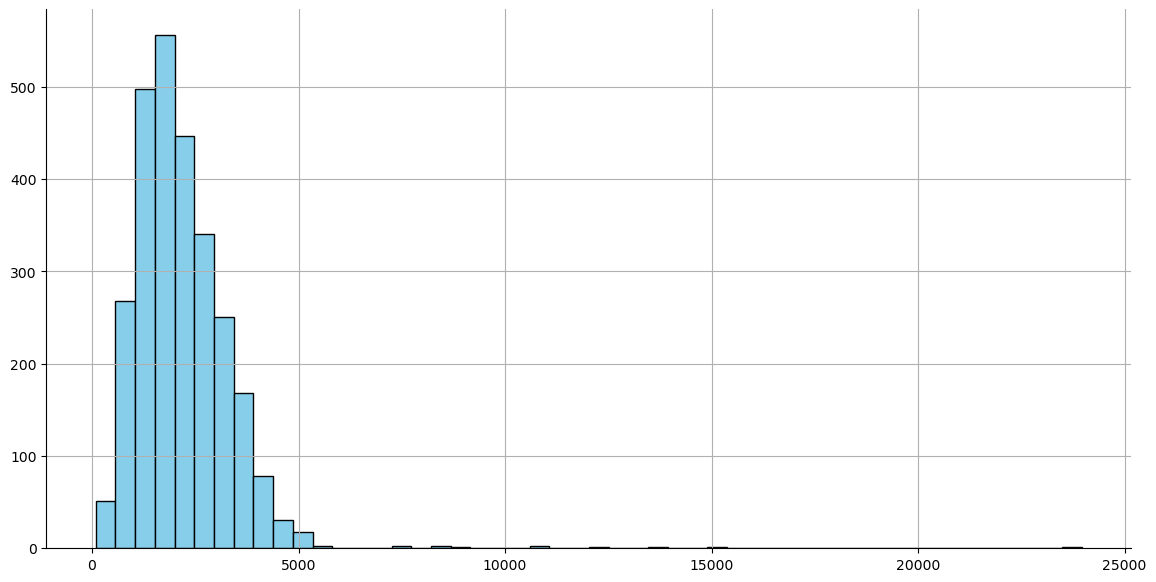

In [54]:
df.mol_weight.hist(bins=50, color='skyblue', edgecolor='black', figsize=(14, 7))
sns.despine()
plt.show()

### 

### Protein analysis

In [55]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [56]:
def calculate_protein_descriptors(sequence):

    if not is_valid_amino_acid_sequence(sequence):
        return pd.Series({})

    analysis = ProteinAnalysis(sequence)

    descriptors = {
        'aromaticity': analysis.aromaticity(),
        'instability_index': analysis.instability_index(),
        'isoelectric_point': analysis.isoelectric_point(),
        'helix_fraction': analysis.secondary_structure_fraction()[0],
        'turn_fraction': analysis.secondary_structure_fraction()[1],
        'sheet_fraction': analysis.secondary_structure_fraction()[2],
        'molar_extinction_coefficient_reduced': analysis.molar_extinction_coefficient()[0],
        'molar_extinction_coefficient_oxidized': analysis.molar_extinction_coefficient()[1],
        'gravy': analysis.gravy(),
    }
    
    return pd.Series(descriptors)

df_protein_descriptors = df['standard_sequence'].apply(calculate_protein_descriptors)
assert len(df_protein_descriptors) == len(df)

In [60]:
df = pd.concat([df, df_protein_descriptors], axis=1)
df

,sequence,extra_name,cpp_category,seq_length,cpp_type,origin,mol_weight,is_cpp_3,sequence_category,standard_sequence,...,is_valid_smiles,aromaticity,instability_index,isoelectric_point,helix_fraction,turn_fraction,sheet_fraction,molar_extinction_coefficient_reduced,molar_extinction_coefficient_oxidized,gravy
0,(Acp)-KKKKKRFSFKKSFKLSGFSFKKNKK,NaN,NaN,31,NaN,NaN,3151.8362,yes,Peptide with Substitutions,AKKKKKRFSFKKSFKLSGFSFKKNKK,...,True,0.192308,10.653846,11.608322,0.538462,0.230769,0.230769,0.0,0.0,-1.492308
1,(Acp)-RKRRQTSMTDFYHSKRRLIFS,NaN,NaN,27,NaN,NaN,2785.1939,yes,Peptide with Substitutions,ARKRRQTSMTDFYHSKRRLIFS,...,True,0.136364,115.700455,11.839377,0.227273,0.181818,0.318182,1490.0,1490.0,-1.272727
2,(biotin)-lclrpvgggweaklakalakalakhlakalakalkacea,NaN,NaN,48,NaN,NaN,NaN,yes,Biotinylated,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,(biotin)-lclrpvggrsqsrsryyrqrqrsrrrrrrs,NaN,NaN,39,NaN,NaN,NaN,yes,Biotinylated,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,?A-RR-[KRRRRRE],NaN,NaN,15,NaN,NaN,1439.6794,yes,Unknown,ARRKRRRRRE,...,True,0.000000,328.000000,11.999968,0.300000,0.000000,0.000000,0.0,0.0,-3.710000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,vrlpppvrlpppvrlppp,NaN,NaN,18,NaN,NaN,NaN,yes,Enantiomer Mix,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3098,ykqchkkGGkkGsG,NaN,NaN,14,NaN,NaN,246.2205,yes,Enantiomer Mix,GGGG,...,True,0.000000,100.050000,5.525000,0.000000,1.000000,0.000000,0.0,0.0,-0.400000
3099,"α,ε(Stearyl-AGYLLG)2KINLKALAALAKKIL",NaN,NaN,35,NaN,NaN,2269.8105,yes,Uptake with Stearyl,SAGYLLGKINLKALAALAKKIL,...,True,0.045455,-0.995455,10.176286,0.681818,0.181818,0.409091,1490.0,1490.0,0.854545
3100,δ-(Stearyl-AGYLLG)OINLKALAALAKKIL,NaN,NaN,33,NaN,NaN,NaN,yes,Uptake with Stearyl,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df.to_csv('with_descriptors.csv', index=False)